## S1 - Spatial coherence 2 phase STD
+ Figure S1 - Phase STD of PS and DS versus Coherence

In [1]:
%matplotlib inline
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt, lines, gridspec
from mintpy.defaults.plot import *
from mintpy.utils import ptime, plot as pp
from mintpy.simulation import decorrelation as decor

work_dir = os.path.expanduser('~/Documents/Paper/2019_MintPy/figs_src/sim_weightFunc')
os.chdir(work_dir)
print('Go to directory',work_dir)

Go to directory /Users/yunjunz/Documents/Paper/2019_MintPy/figs_src/sim_weightFunc


In [2]:
# Generate lookup table file for Fig. S1b
pfile = os.path.join(work_dir, 'coh_phaStd_lut.pickle')
if not os.path.isfile(pfile):
    epsilon = 1e-3
    coh = np.linspace(epsilon, 1.-epsilon, 1000, dtype=np.float64)

    maxL = 80
    std_ds = np.zeros((maxL, coh.size), np.float64)
    std_ps = np.zeros((maxL, coh.size), np.float64)
    prog_bar = ptime.progressBar(maxValue=maxL)
    for L in range(1, maxL+1):
        std_ds[L-1, :] = np.sqrt(decor.phase_variance_ds(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.
        std_ps[L-1, :] = np.sqrt(decor.phase_variance_ps(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.
        prog_bar.update(L, suffix='L={:02d}'.format(L))
    prog_bar.close()
    
    # save to pickle file
    ds = {}
    ds['coherence'] = coh
    ds['phaseStd_DS'] = std_ds
    ds['phaseStd_PS'] = std_ps
    with open(pfile, 'wb') as f:
        pickle.dump(ds, f)
    print('saved to pickle file {}.'.format(pfile))
    ds = dict(ds)
else:
    # read pickle file
    print('reading existed pickle file:', pfile)
    with open(pfile, 'rb') as f:
        ds = pickle.load(f)
    coh = ds['coherence']
    std_ds = ds['phaseStd_DS']
    std_ps = ds['phaseStd_PS']
print('Done.')

reading existed pickle file: /Users/yunjunz/Documents/Paper/2019_MintPy/figs_src/sim_weightFunc/coh_phaStd_lut.pickle
Done.


save figure to file /Users/yunjunz/Documents/Paper/2019_MintPy/figs_src/sim_weightFunc/coherence2phaseStd.jpg


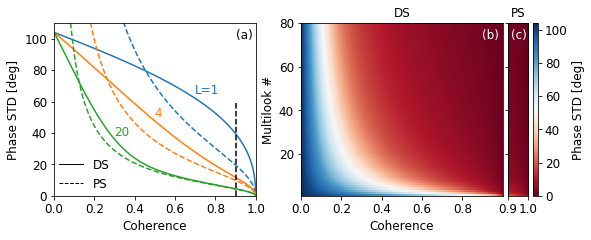

In [3]:
## Fig. S1 - phase STD as function of coherence

fig = plt.figure(figsize=[7,3])
ax1 = fig.add_axes([0.00, 0.1, 0.40, 0.8])
ax2 = fig.add_axes([0.49, 0.1, 0.40, 0.8])
ax3 = fig.add_axes([0.90, 0.1, 0.04, 0.8])
cax = fig.add_axes([0.95, 0.1, 0.01, 0.8])

##### Axes 1 - (Fig 26, Bamler and Hartlz, 1998; Fig 4.6, Hanssen, 2001)
epsilon = 1e-4
coh = np.linspace(epsilon, 1.-epsilon, 1000)
Xs, Ys = [0.7, 0.5, 0.3], [65 , 50 , 38]
Ls = [1,4,20]
for i in range(len(Ls)):
    L = Ls[i]
    std_ds = np.sqrt(decor.phase_variance_ds(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.
    std_ps = np.sqrt(decor.phase_variance_ps(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.
    ax1.plot(coh, std_ds,       label='DS', color=pp.mplColors[i])
    ax1.plot(coh, std_ps, '--', label='PS', color=pp.mplColors[i])
    # annotation
    txt = str(Ls[i])
    if i == 0:
        txt = 'L='+str(Ls[i])
    ax1.text(Xs[i], Ys[i], txt, color=pp.mplColors[i], fontsize=font_size)
ax1.plot(np.array([0.9,0.9]), np.array([0,60]), 'k--')
ax1.set_xlabel('Coherence', fontsize=font_size)
ax1.set_ylabel('Phase STD [deg]', fontsize=font_size)
ax1.set_xlim([0,1])
ax1.set_ylim([0,110])
# legend
line_ds = lines.Line2D([],[],color='k',ls='-', lw=1, label='DS')
line_ps = lines.Line2D([],[],color='k',ls='--',lw=1, label='PS')
ax1.legend(handles=[line_ds,line_ps], fontsize=font_size, loc='lower left', frameon=False, borderaxespad=0.03)

##### Axes 2/3 - 80 levels in lookup table
Ls = range(1,81)
std_max = np.max(ds['phaseStd_DS'])
## Plot
im2 = ax2.imshow(ds['phaseStd_DS'], vmin=0.0, vmax=std_max, cmap='RdBu', extent=[np.min(coh),1.0,max(Ls),min(Ls)])
im3 = ax3.imshow(ds['phaseStd_PS'], vmin=0.0, vmax=std_max, cmap='RdBu', extent=[np.min(coh),1.0,max(Ls),min(Ls)])
ax2.set_title('DS', fontsize=font_size)
ax3.set_title('PS', fontsize=font_size)
ax2.set_xlabel('Coherence', fontsize=font_size)
ax2.set_ylabel('Multilook #', fontsize=font_size)
ax2.set_xticks([0.0,0.2,0.4,0.6,0.8])
ax3.set_xlim(0.9, 1.0)
ax3.set_yticklabels([])
for ax in [ax2, ax3]:
    ax.set_aspect('auto')
    ax.invert_yaxis()
for ax in [ax1, ax2, ax3]:
    ax.tick_params(labelsize=font_size)

# number
ax1.text(0.900, 100, '(a)', color='k', fontsize=font_size)
ax2.text(0.900, 73,  '(b)', color='w', fontsize=font_size)
ax3.text(0.915, 73,  '(c)', color='w', fontsize=font_size)

## Colorbar
cbar = fig.colorbar(im2, cax=cax)
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Phase STD [deg]', fontsize=font_size)

# output
out_file = os.path.join(os.getcwd(), 'coherence2phaseStd.jpg')
print('save figure to file', out_file)
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()